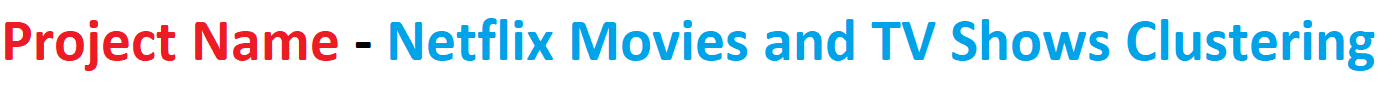

**Project Type** - Unsupervised Machine Learning

**Contribution** - Individual

# **Project Summary** -

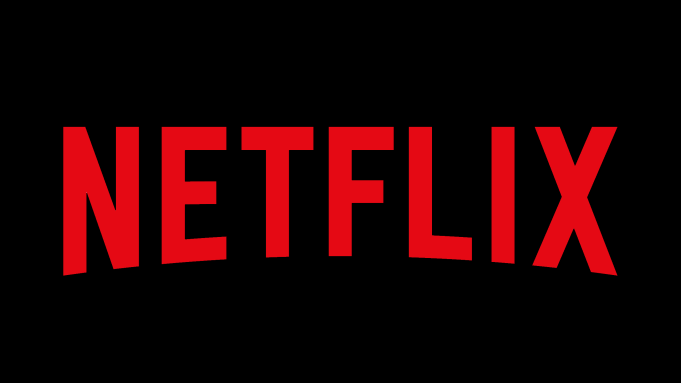

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.




This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Github Link** -

# **Problem Statement**

*This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.*

*In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.*

*Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.*

# **Dataset Description** -

**1. show_id :** Unique ID for every Movie / Tv Show

**2. type :** Identifier - A Movie or TV Show

**3. title :** Title of the Movie / Tv Show

**4. director :** Director of the Movie

**5. cast :** Actors involved in the movie / show

**6. country :** Country where the movie / show was produced

**7. date_added :** Date it was added on Netflix

**8. release_year :** Actual Releaseyear of the movie / show

**9. rating :** TV Rating of the movie / show

**10. duration :** Total Duration - in minutes or number of seasons

**11. listed_in :** Genere

**12. description:** The Summary description

#### **Define Your Business Objective?**

1. Exploratory Data Analysis.

2. Understanding what type content is available in different countries.

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features.

# ***Let's Begin !***

First of all, import all required libraries like pandas, matplotlib,Sklearn,Scipy etc. These libraries are used to load, preprocess and visualize the dataset.Then loading data using the read_csv function of the pandas module.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv' )

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset last View

In [ ]:
# Dataset Last Look
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In the dataset there are no duplicate values.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

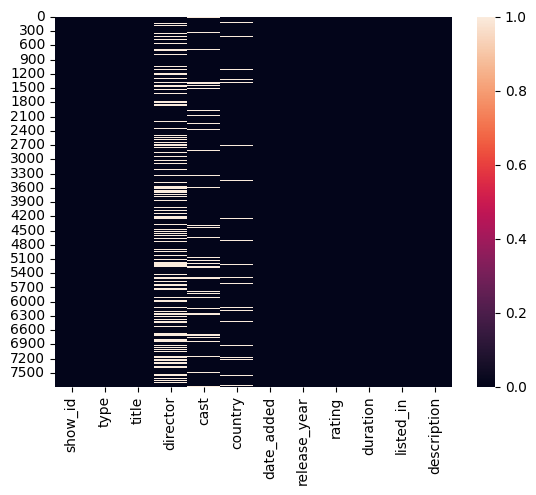

In [ ]:
# Visualizing the missing values
#null value heatmap
sns.heatmap(df.isnull())

### What did you know about your dataset?

In our dataset we have null values in the following columns-

director : 2389

cast : 718

country : 507

date_added : 10

rating : 7

So, we need to handle the null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


## Variable Description

We have both numeric and categorical variables in our dataset.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
#total null values
df.isnull().sum().sum()

3631

In [ ]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [ ]:
#again checking if there are null values or not
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Dataset Rows & Columns count
df.shape

(7777, 12)

# **Feature engineering**

In [ ]:
# Top countries
df.country.value_counts()

country
United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 682, dtype: int64

In [ ]:
# Genre of shows
df.listed_in.value_counts()

listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: 

In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
# contry in which a movie was produced
df.country.value_counts()

country
United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: count, Length: 82, dtype: int64

In [ ]:
# genre of shows
df.listed_in.value_counts()

listed_in
Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals            

In [ ]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

duration
1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: count, dtype: int64

## Date_added column string to Datetime format

In [ ]:
# Typecasting 'date_added' from string to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')
# Applying .str.strip() to remove leading/trailing whitespaces before converting to datetime

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [ ]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [ ]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

In [ ]:
# Dataset Rows & Columns count
df.shape

(7777, 13)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   int64 
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
 11  month_added   7777 non-null   int32 
 12  year_added    7777 non-null   int32 
dtypes: int32(2), int64(2), object(9)
memory usage: 789.9+ KB


In [ ]:
#duration column
df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: int64

# **4.Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

# **Chart-1**

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

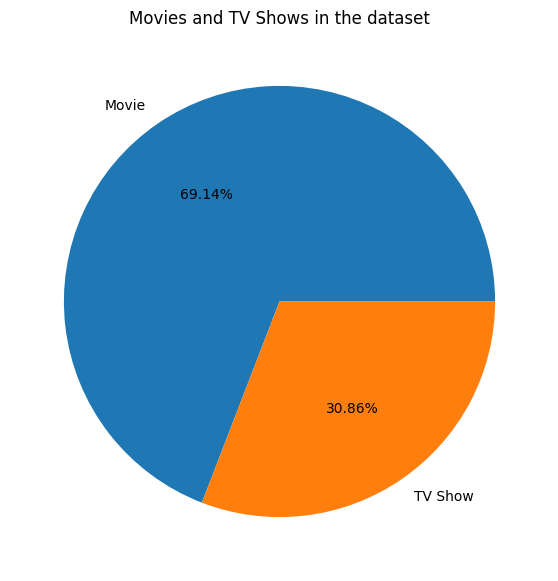

In [ ]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

i. A pie chart, sometimes called a circle chart, is a way of summarizing a set of nominal data or displaying the different values of a given variable



ii. In this pie plot percentage of movies is 69.14% while percentage of TV shows is 30.86% in the dataset.

# **Chart-2**

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

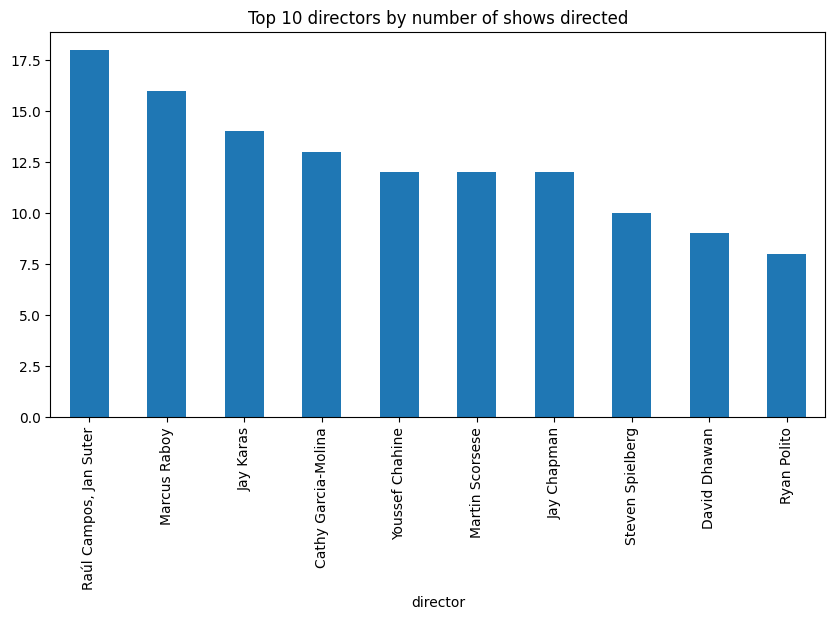

In [ ]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 directors by number of shows directed')

i. A barplot (or barchart) is one of the most common types of graph. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

**ii. This Bar plot is showing Top 10 directors by number of shows directed.**

1.Raul Campos,jan Suter are the top 1 director.

2.Rayan Polito is the top 10th director.


# **Chart-3**

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

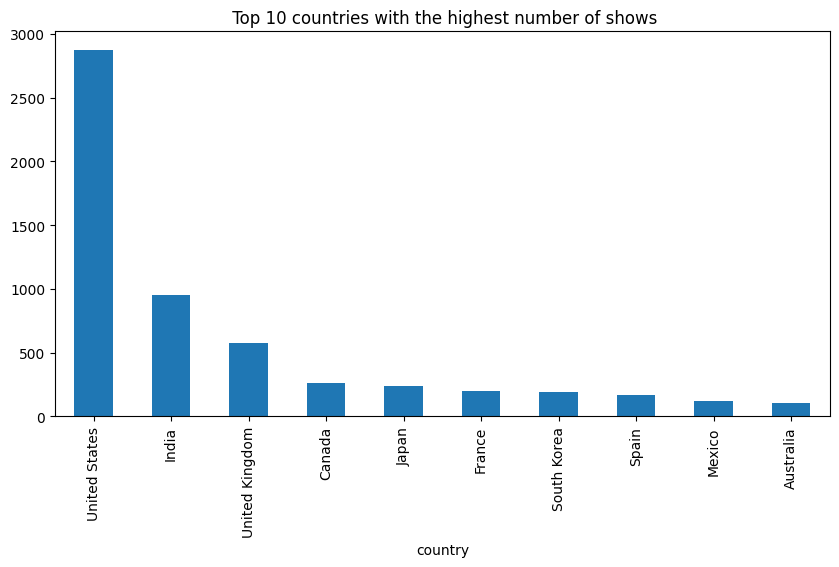

In [ ]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='bar')
plt.title(' Top 10 countries with the highest number of shows')

 A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent.

**In that bar graph showing Top 10 countries with the highest number movies / TV shows in the dataset.**

1.United States is at top one country with highest number of movies / TV shows in the dataset.

2.Australia is at the 10th number with movies / TV shows in the dataset

In [ ]:
# % share of movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [ ]:
# % share of movies / tv shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

# **Chart-4**

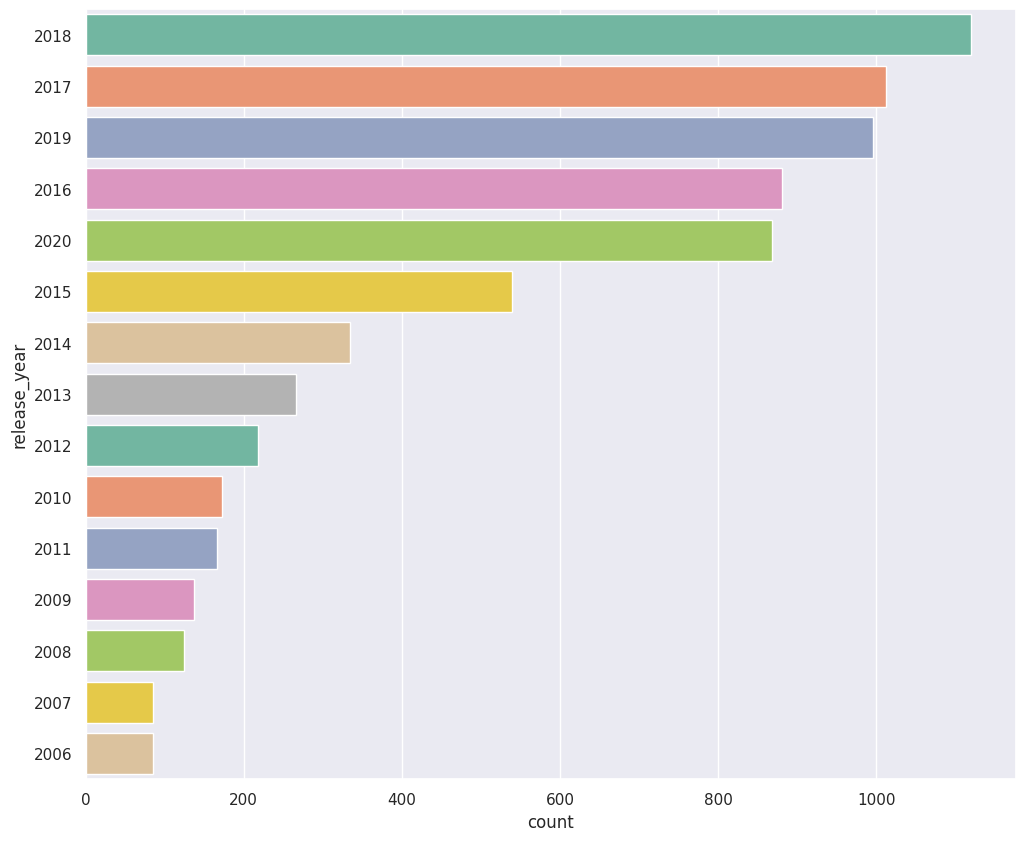

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df, palette="Set2", order=df['release_year'].value_counts().index[0:15])

# **Chart-5**

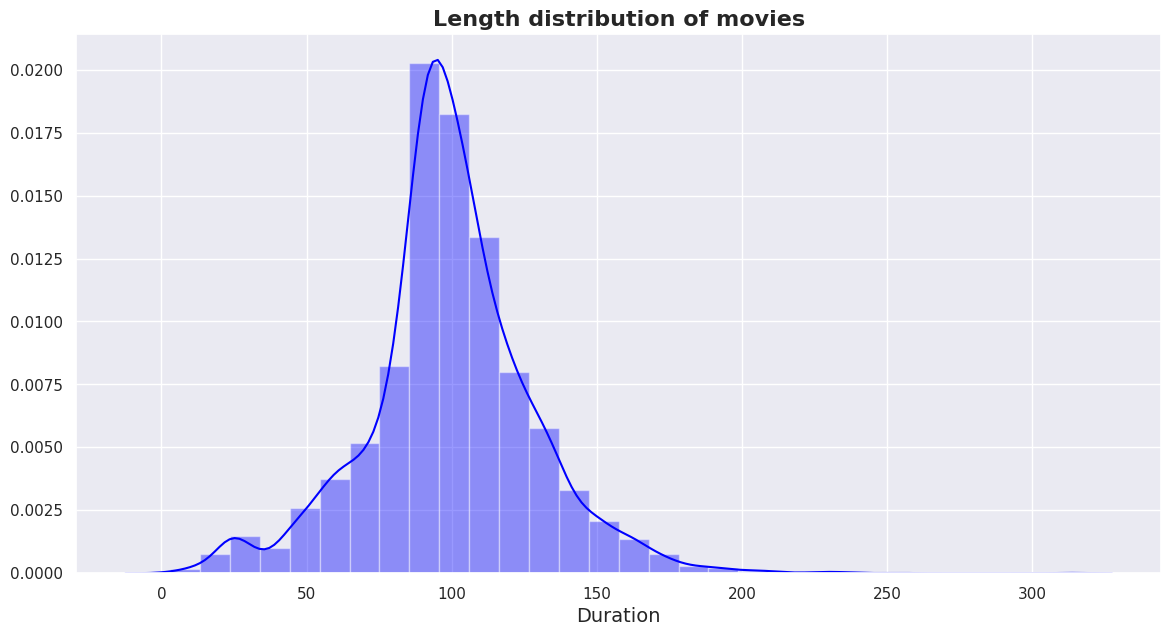

In [ ]:
# Length distribution of movies
movie_df = df[df['type']=='Movie']

plt.figure(figsize=(14, 7))

sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

**Inference:** Most content are about 70 to 120 min duration for movies

# **Chart-6**

In [ ]:
#rating column distribution by plotly
fig_donut = px.pie(df, names='rating', height=1000, width=1000, hole=0.7,

title='MOST OF PROGRAMME ON NETFLIX IS TV-14 & TV-MA RATED',

color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=80, b=10, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

In [ ]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [ ]:
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

country_order = df['principal_country'].value_counts()[:11].index
content_data = df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [ ]:
df['count'] = 1
data = df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index(names=['country_temp'])[:10]
data = data['principal_country']

Flix_df_heatmap = df.loc[df['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['rating'],normalize = "index").T
Flix_df_heatmap

principal_country
rating


# **Chart-7**

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

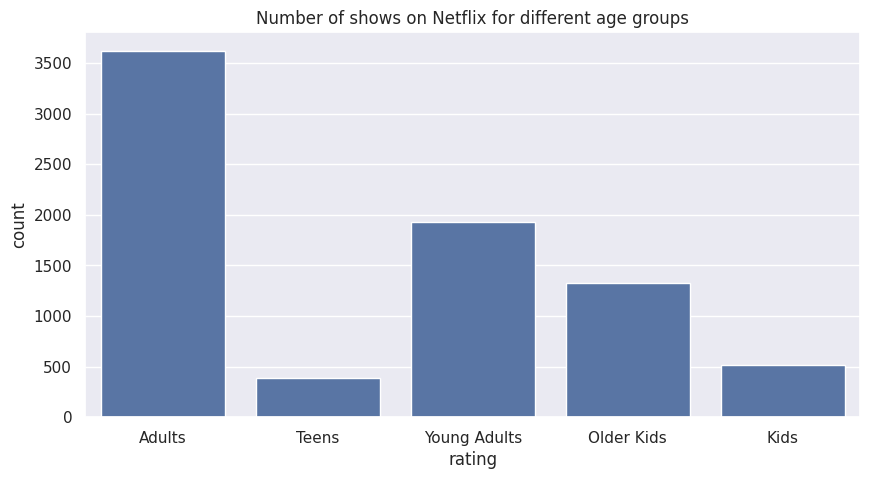

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)
plt.title('Number of shows on Netflix for different age groups')

i.  countplot() method is used to Show the counts of observations in each categorical bin using bars.

ii. In this count plot we found that Number of shows on Netflix for Adults is highest and second highest is for Young Adults.

# **Chart-8**

# **Genres**

Text(0.5, 1.0, 'Top 10 genres')

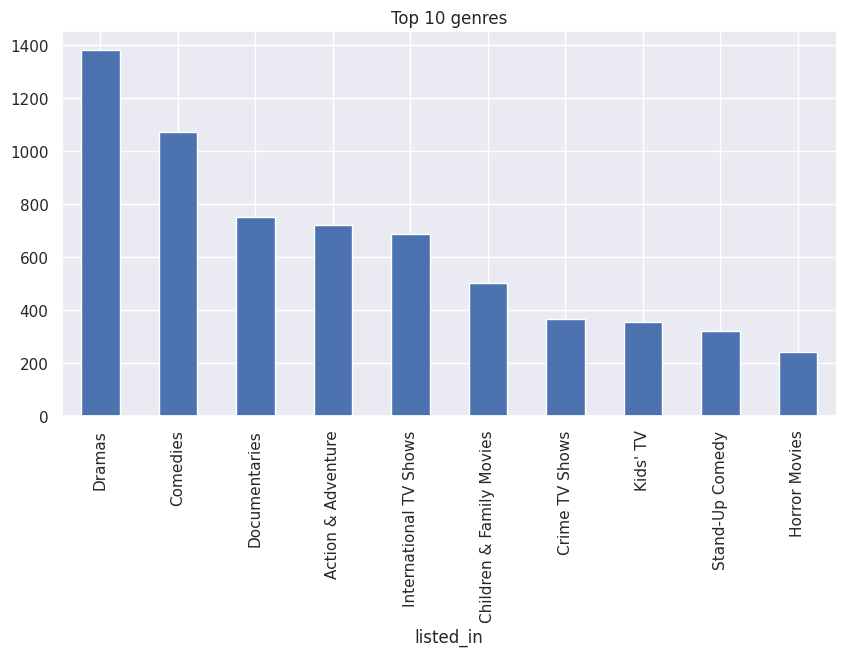

In [ ]:
# Top 10 genres
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres')

i. A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle. The length and heights of the bar chart represent the data distributed in the dataset. In a bar chart, we have one axis representing a particular category of a column in the dataset and another axis representing the values or counts associated with it.  Bar charts can be plotted vertically or horizontally. A vertical bar chart is often called a column chart.

ii. In this  bar plot we found Dramas are large value_counts of shows and movies and Comedies are the second large value_counts of shows and Movies.

In [ ]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [ ]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

# **Chart-9**

# **Bivariate Analysis**

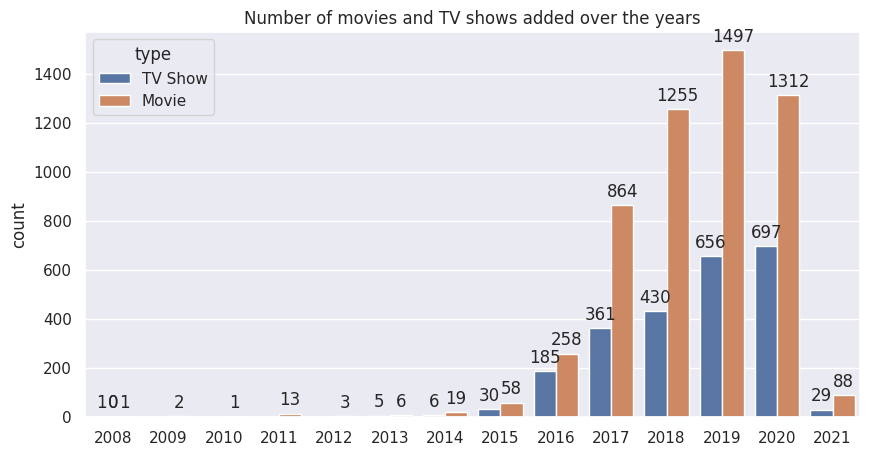

In [ ]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

i. A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects. Such a plot permits you to see at a glance the degree and pattern of relation between the two variables.

ii. In this graph we found that Number of movies and TV shows added over the years.2019 are the 1497 movies and 656 TV shows are there. 2020 year 1312 movies and 697 TV shows are there and 2018 year 1255 movies and 430 TV shows are there.




# **Chart-10**

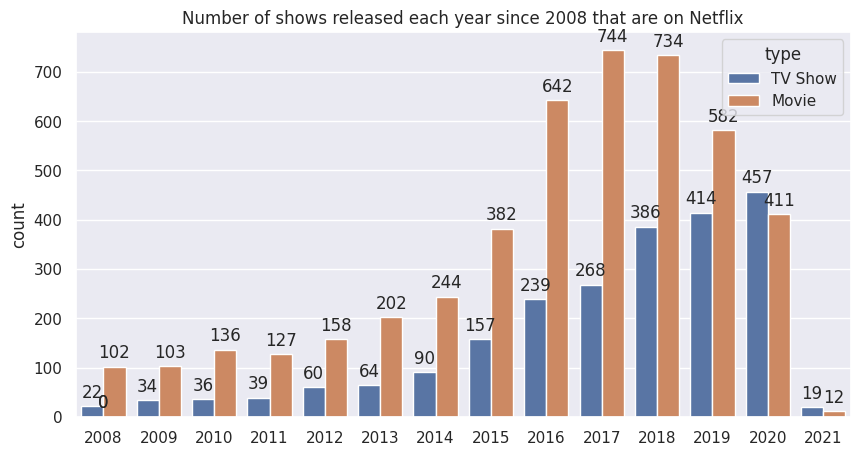

In [ ]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


i. A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects. Such a plot permits you to see at a glance the degree and pattern of relation between the two variables.

ii. In this graph we found that Number of shows released each year since 2008 that are on Netflix.see this graph Before 2019 Movies are highest number of released but 2020 and 2021 TV shows are the highest number of released.

# **Chart-11**

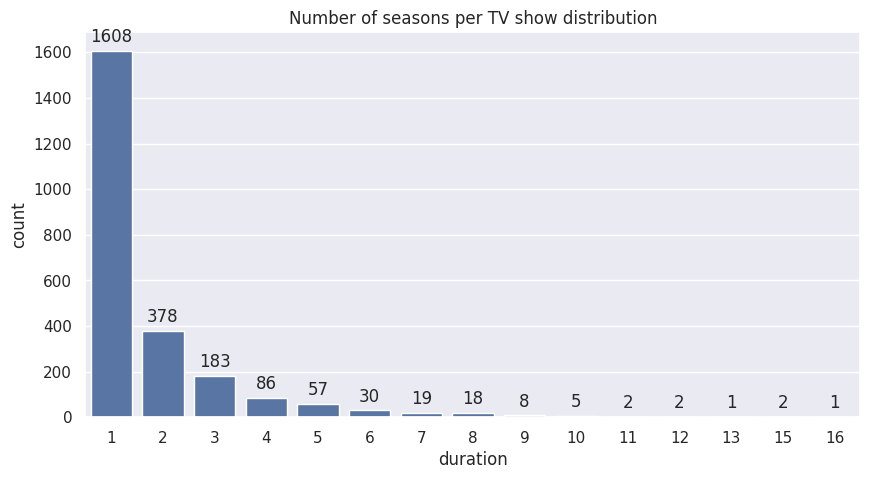

In [ ]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

i. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.

ii. In this graph we found Number of per Seasons in each TV show count.first seasons are 1608 and second seasons are 378 and third seasons are 183 number of counting are there.

In [ ]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

# **Chart-12**

# **Genres for TV_Shows**

Text(0.5, 1.0, 'Top 10 genres for movies')

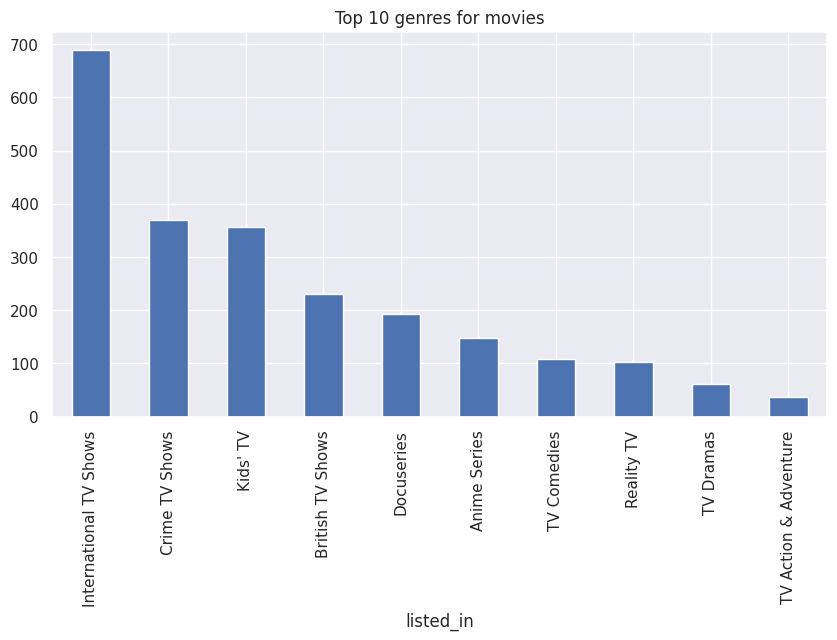

In [ ]:
# Top 10 genre for TV shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres for movies')

i. A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

ii. In this graph we found Top 10 genres for movies. International TV Shows are the highest number of genres type of TV shows and Crime TVShows and Kid's Shows are approximately same for generes type of TV shows.

# **Chart-13**

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

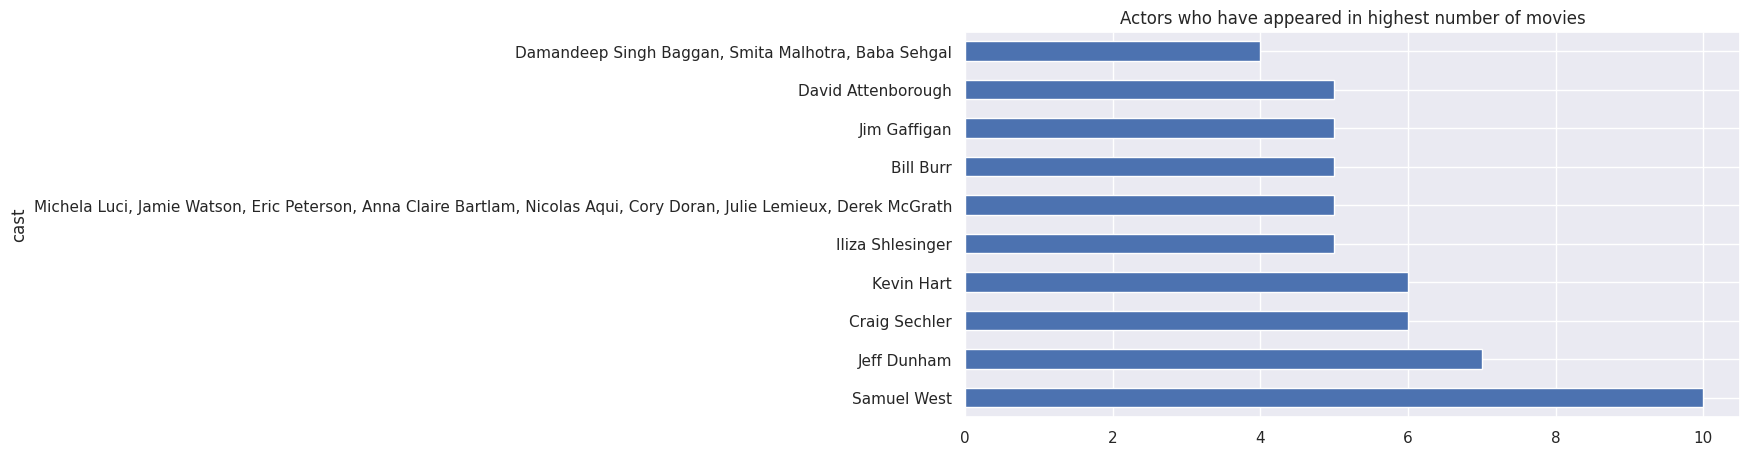

In [ ]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

i. A horizontal bar plot is a plot that presents quantitative data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

ii. In this graph we found Top actors for movies. Top one actor in movies are Samuel West and second highest actor are jeff Dunham and third highest actor of movies are Craig Sechler and Kevin Hart.

# **Chart-14**

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

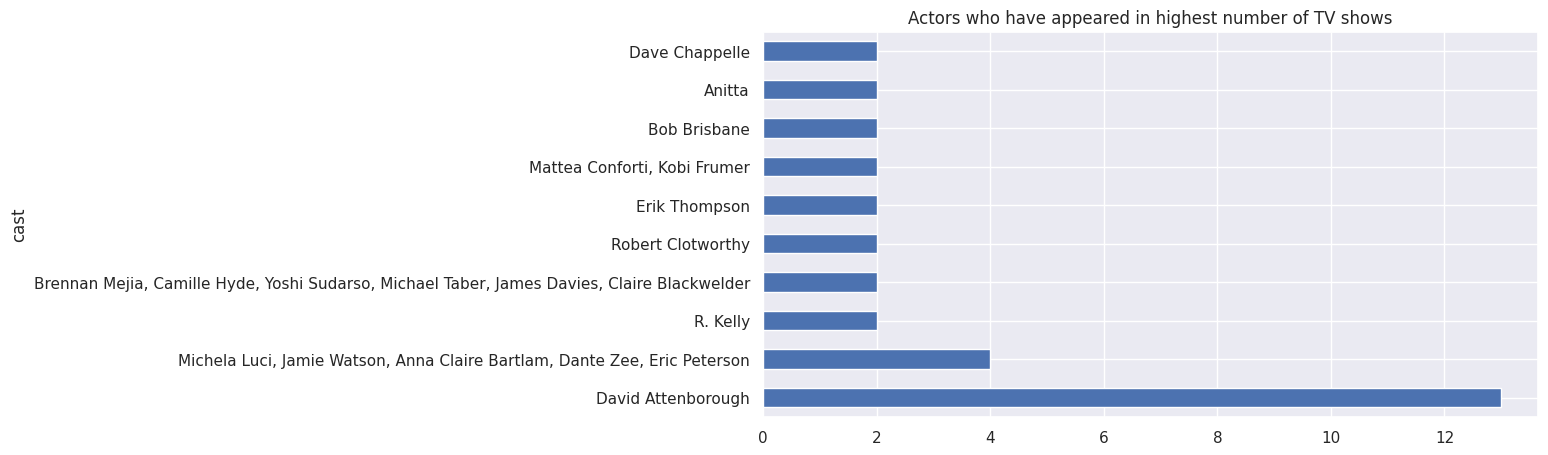

In [ ]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

i. A horizontal bar plot is a plot that presents quantitative data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

ii. In this graph we found Actors who have appeared highest number of TV shows. Top one actor of TV Shows is David Attenborough and second highest actor in TV shows  many are there like Michela Luci,Jamie Watson,Anna Claire Bartlam,Dante Zee and Eric peterson.

# **Chart-15**

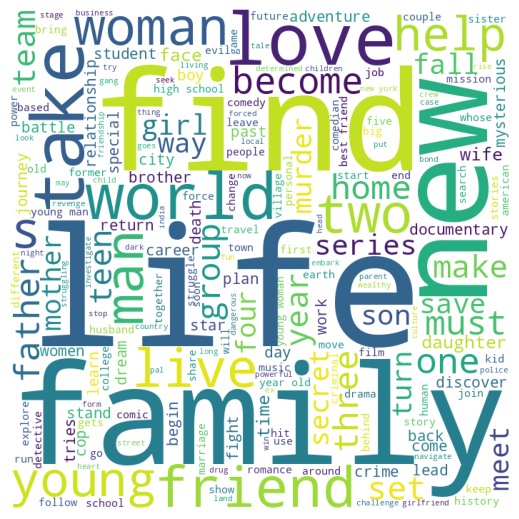

In [ ]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

i. Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s).

ii. In this graph we found life,family,love,friend,world,new,find are the most repeated words.

# **Data Processing**

In [ ]:
# Using the model_df dataset for clustering since
# it does not require handling missing values
Dataset = df.copy()

In [ ]:
Dataset.fillna('',inplace=True)

In [ ]:
# Combining all the clustering attributes into a single column

Dataset['clustering'] = (Dataset['director'] + ' ' +
                                Dataset['cast'] +' ' +
                                Dataset['country'] +' ' +
                                Dataset['listed_in'] +' ' +
                                Dataset['description'])

In [ ]:
# Select the 100 number of clusters for the dataset
Dataset['clustering'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

# **Removing Punctuation**

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
Dataset['clustering'] = Dataset['clustering'].apply(remove_punctuation)

In [ ]:
# Select the 100 number of clusters for the dataset
Dataset['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing non-ASCII characters:**

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
Dataset['clustering'] = remove_non_ascii(Dataset['clustering'])

In [ ]:
# Select the 100 number of clusters for the dataset
Dataset['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing stopwords**

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sentences = stopwords.words('english')
# displaying the stopwords
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sentences]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
Dataset['clustering'] = Dataset['clustering'].apply(remove_stopwords)

In [ ]:
# Select the 100 number of clusters for the dataset
Dataset['clustering'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

# **Removing  Lemmatization:**

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization
Dataset['clustering'] = lemmatize_verbs(Dataset['clustering'])

In [ ]:
# Select the 100 number of clusters for the dataset
print(Dataset['clustering'][100])

rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system


# **Tokenization:**

In [ ]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()

In [ ]:
# Create text column based on dataset
Dataset['clustering'] = Dataset['clustering'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
# Select the 100 number of Tokenization for the dataset
print(Dataset['clustering'][100])

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


# **Vectorization:**

In [ ]:
# clustering tokens saved in a variable
clustering_vectorization = Dataset['clustering']

In [ ]:
# Tokenization
def tokenizer(text):
  return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)
x = tfidf.fit_transform(clustering_vectorization)

In [ ]:
# Dataset Rows & Columns count
x.shape

(7777, 20000)

In [ ]:
# convert X into array form for clustering
X = x.toarray()

In [ ]:
# Check the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#**Reducing Diemensionality using PCA**

In [ ]:
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X)

PCA()

Text(0, 0.5, 'cumulative explained variance')

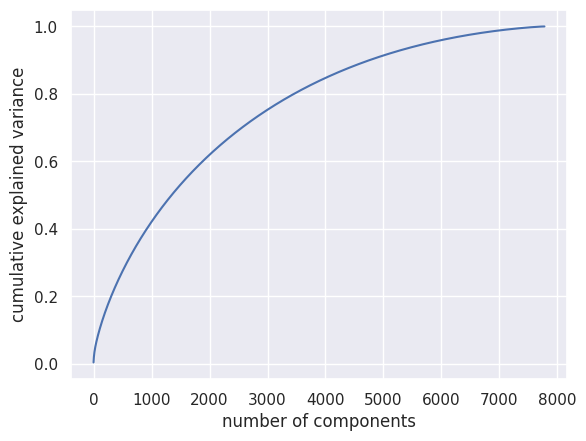

In [ ]:
#explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500,random_state=32)
pca.fit(X)

PCA(n_components=2500, random_state=32)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(7777, 2500)

# **Now start wih Unservised Machine Learning clustering algorithms**

##**1.K-Means Clustering:**

Text(0, 0.5, 'WCSS')

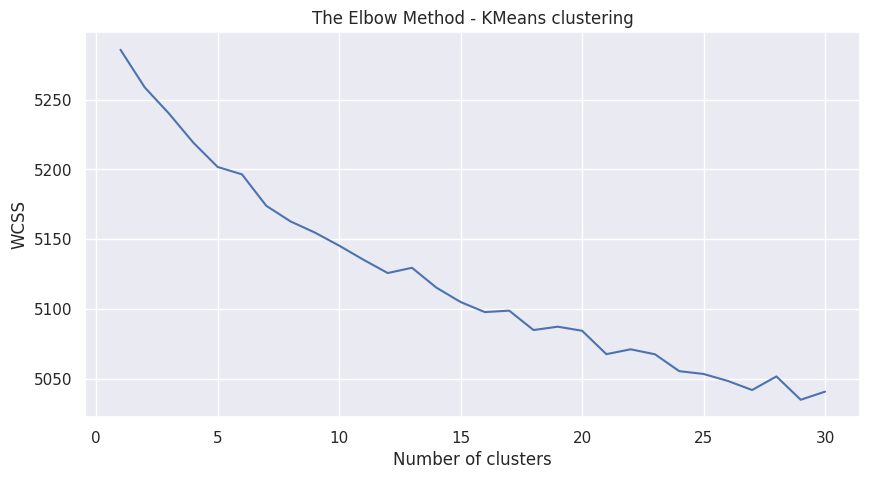

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=40)
kmeans.fit(x_pca)

KMeans(n_clusters=28, random_state=33)

In [ ]:
# Adding a kmeans cluster number attribute
Dataset['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

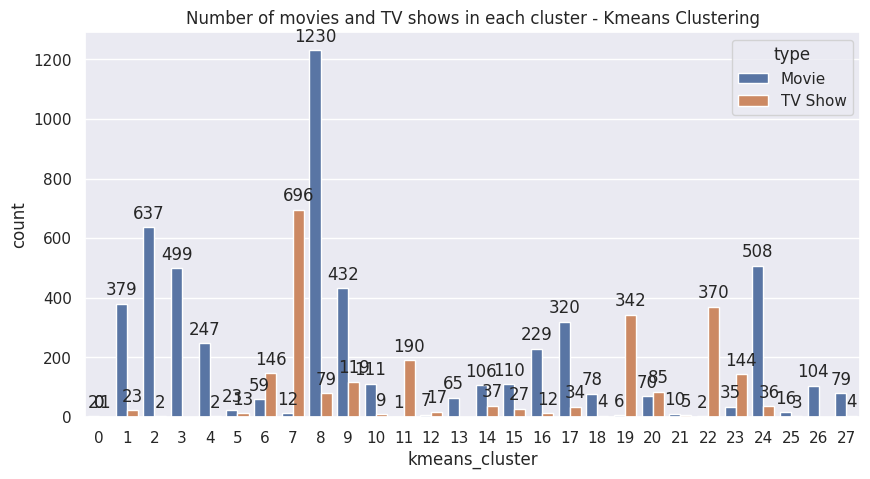

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=Dataset, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##**2.Hierarchical clustering:**

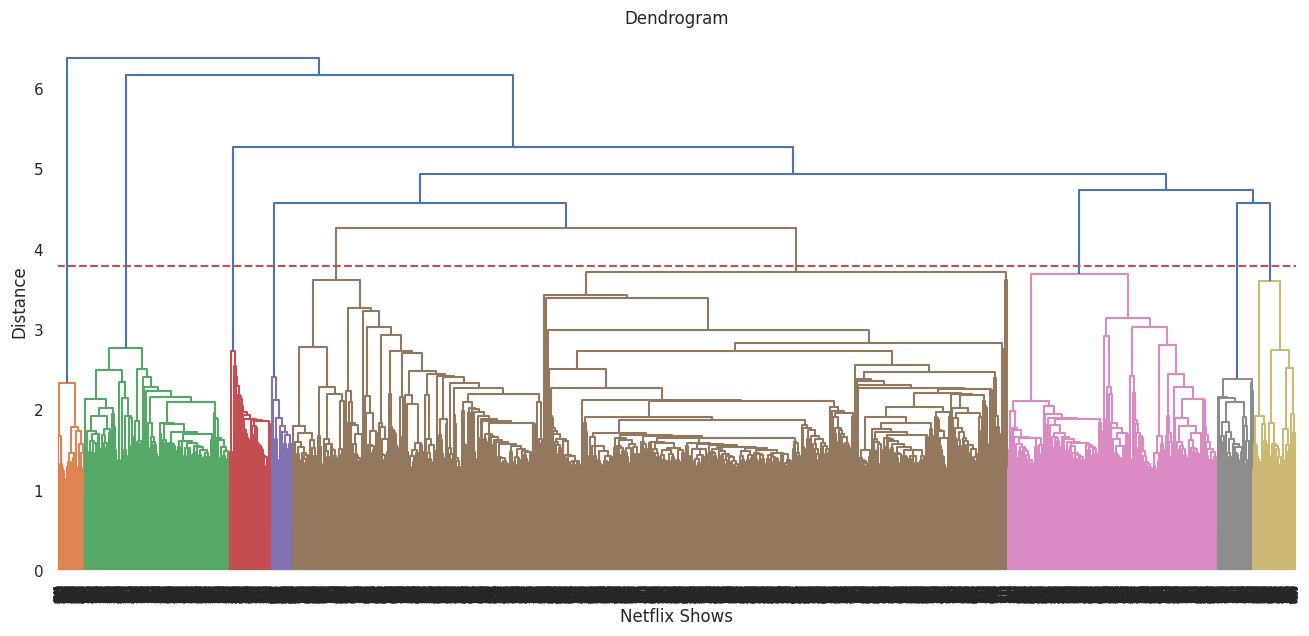

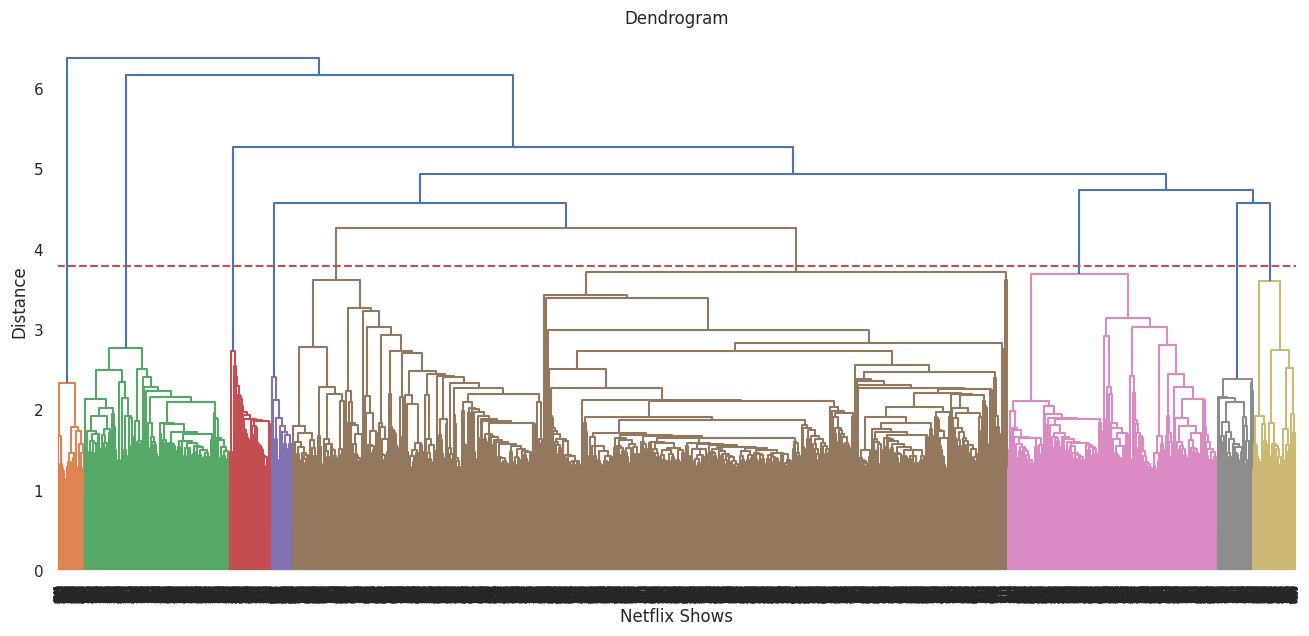

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(16, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(x_pca)

In [ ]:
# Adding a kmeans cluster number attribute
Dataset['hierarchical_cluster'] = hierarchical_labels

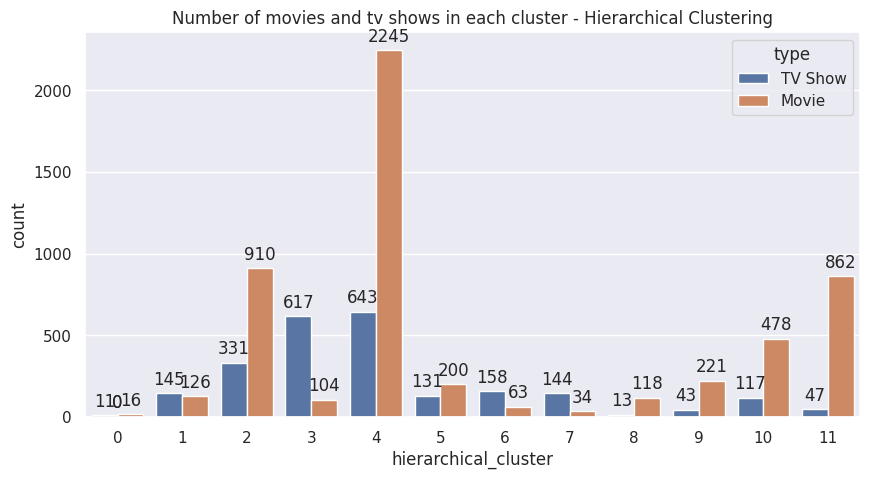

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=Dataset, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# **Using Content based recommender system**

In [ ]:
# Changing the index of the df from show id to show title
Dataset['show_id'] = Dataset.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

Dataset['clustering'] = Dataset['clustering'].apply(lambda x: convert(x))

In [ ]:
# setting title of movies/Tv shows as index
Dataset.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(Dataset['clustering'])

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
# Dataset Rows & Columns count
cosine_similarity.shape

(7777, 7777)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(Dataset.index)

def recommendation_df(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(Dataset.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for 'A Man Called God'
recommendation_df('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'The King: Eternal Monarch',
 'My Mister',
 'Illang: The Wolf Brigade',
 'Extracurricular',
 'The Lies Within',
 'Reply 1994',
 'Private Lives']

In [ ]:
# Recommendations for 'Peaky Blinders'
recommendation_df('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Rebellion',
 'The Blue Planet: A Natural History of the Oceans',
 'Mega Food',
 'I AM A KILLER: RELEASED',
 'Botched Up Bodies',
 'The Hunt',
 'The Murder Detectives',
 'Inside The Freemasons',
 'Happy Valley',
 'Greatest Events of WWII in Colour']

In [ ]:
# Recommendations for 'Stranger Things'
recommendation_df('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Tread',
 'Prank Encounters',
 'Zombie Dumb',
 'Kiss Me First',
 'Henry Danger',
 'Drug Lords',
 'Haunted',
 'Living Undocumented',
 'Million Dollar Beach House']

#**Conclusion**

1.In this project, we worked on a text clustering problem where in we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.


2.The dataset contained about 7787 records, and 12 attributes.
We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).


3.It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.

4.Once obtained the required insights from the EDA, we start with Pre-processing the text data by removing the punctuation, and, stop words. This filtered data is passed through TF - IDF Vectorizer since we are conducting a text-based clustering and the model needs the data to be vectorized in order to predict the desired results.


5.It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.


6.Through TFIDF Vectorization, we created a total of 20000 attributes.
We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.
We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.


7.Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.


8.A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

# **Sucessfully Completed Machine Learning Unsupervised Algorithm Capstone Project !!!**